- **Purpose:** To explore the chapter 7 on using generalized linear models (Binomial). The same procedure was followed but with a different dataset
- **Date:** July 30, 2025

# 1. Libraries and dataset

In [2]:
# Install the necessary libraries
install.packages("GGally")

# Load the libraries
library(tidyverse)
library(readr)
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘S7’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the c

In [9]:
set.seed(41) # seed for reproducibility

In [103]:
# Make a dataframe
id <- 1:1000
gender <- sample(c("female", "male"), 1000, replace = TRUE, prob = c(0.45, 0.55))
prog <- c(rep("vocation", 400), rep("academic", 300), rep("general", 300)) # response variable
ses <- c( # socio-economic status
  rep("high", 100), rep("middle", 100), rep("low", 200), # vocation = 400
  rep("high", 180), rep("middle", 80), rep("low", 40), # academic = 300
  rep("high", 90), rep("middle", 130), rep("low", 80) # general = 300
  )
read <- c(
  rnorm(400, mean = 60, sd = 20), # vocation = 400
  rnorm(300, mean = 80, sd = 10), # academic = 300
  rnorm(300, mean = 75, sd = 17) # general = 300
  )
write <- c(
  rnorm(400, mean = 58, sd = 22), # vocation = 400
  rnorm(300, mean = 76, sd = 13), # academic = 300
  rnorm(300, mean = 72, sd = 19) # general = 300
  )
math <- c(
  rnorm(400, mean = 70, sd = 18), # vocation = 400
  rnorm(300, mean = 90, sd = 6), # academic = 300
  rnorm(300, mean = 85, sd = 8) # general = 300
  )
science <- c(
  rnorm(400, mean = 73, sd = 22), # vocation = 400
  rnorm(300, mean = 87, sd = 12), # academic = 300
  rnorm(300, mean = 85, sd = 16) # general = 300
  )
student <- data.frame(
  "id" = id,
  "gender" = gender,
  "ses" = ses,
  "prog" = prog,
  "read" = read,
  "write" = write,
  "math" = math,
  "science" = science
)

student <- student |>
  mutate_at(c("gender", "ses", "prog"), as.factor) # convert the selected columns to factors

head(student)

,id,gender,ses,prog,read,write,math,science
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,female,high,vocation,43.53153,52.52003,74.22051,70.21472
2,2,male,high,vocation,79.61524,95.11435,55.74813,74.73432
3,3,female,high,vocation,92.38439,29.90045,59.12297,92.35284
4,4,female,high,vocation,71.90747,28.86629,31.18168,94.53849
5,5,male,high,vocation,62.85160,69.90427,50.03488,68.80488
6,6,male,high,vocation,58.42747,45.12733,87.97320,90.32922


# 2. EDA

In [104]:
# summary
summary(student)

       id            gender        ses            prog          read        
 Min.   :   1.0   female:453   high  :370   academic:300   Min.   :  4.126  
 1st Qu.: 250.8   male  :547   low   :320   general :300   1st Qu.: 58.931  
 Median : 500.5                middle:310   vocation:400   Median : 73.363  
 Mean   : 500.5                                            Mean   : 70.375  
 3rd Qu.: 750.2                                            3rd Qu.: 84.211  
 Max.   :1000.0                                            Max.   :112.354  
     write              math           science      
 Min.   : -5.619   Min.   : 11.94   Min.   : 22.74  
 1st Qu.: 53.749   1st Qu.: 74.06   1st Qu.: 69.84  
 Median : 67.173   Median : 84.63   Median : 81.22  
 Mean   : 65.986   Mean   : 81.03   Mean   : 80.46  
 3rd Qu.: 78.883   3rd Qu.: 91.17   3rd Qu.: 92.40  
 Max.   :118.799   Max.   :125.67   Max.   :128.67  

In [105]:
# Program per socio-economic condition
with(student, table(ses, prog))

        prog
ses      academic general vocation
  high        180      90      100
  low          40      80      200
  middle       80     130      100

In [106]:
# Program per gender
with(student, table(gender, prog))

        prog
gender   academic general vocation
  female      142     139      172
  male        158     161      228

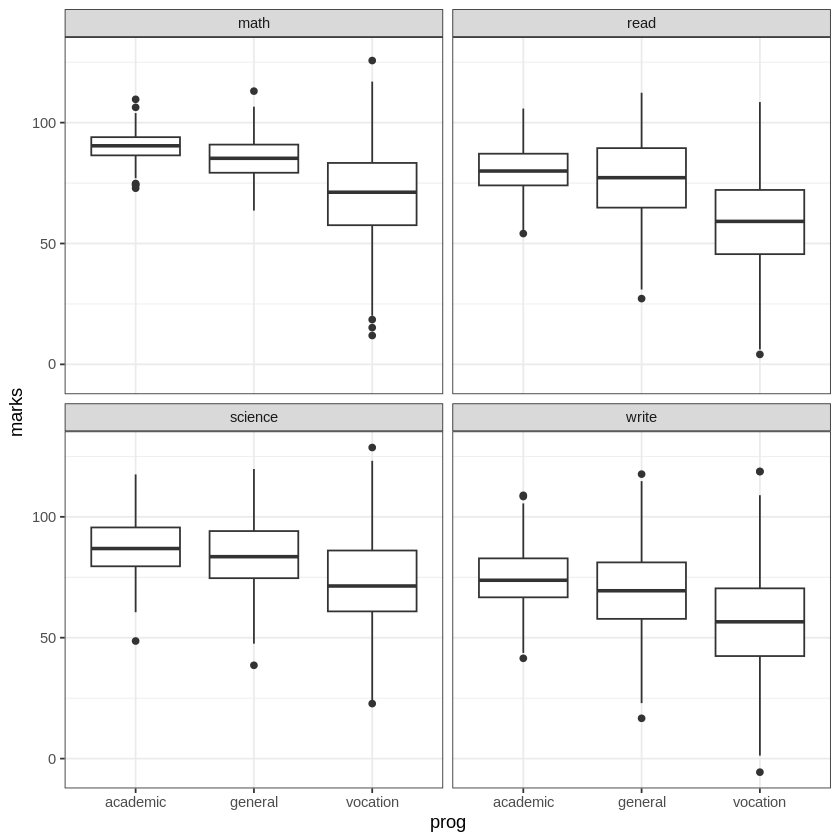

In [107]:
# Plot the scores per program
student |>
  pivot_longer(read:science, values_to = "marks", names_to = "subs") |>
  ggplot(aes(x = prog, y = marks)) +
  geom_boxplot() +
  facet_wrap(~subs) +
  theme_bw()

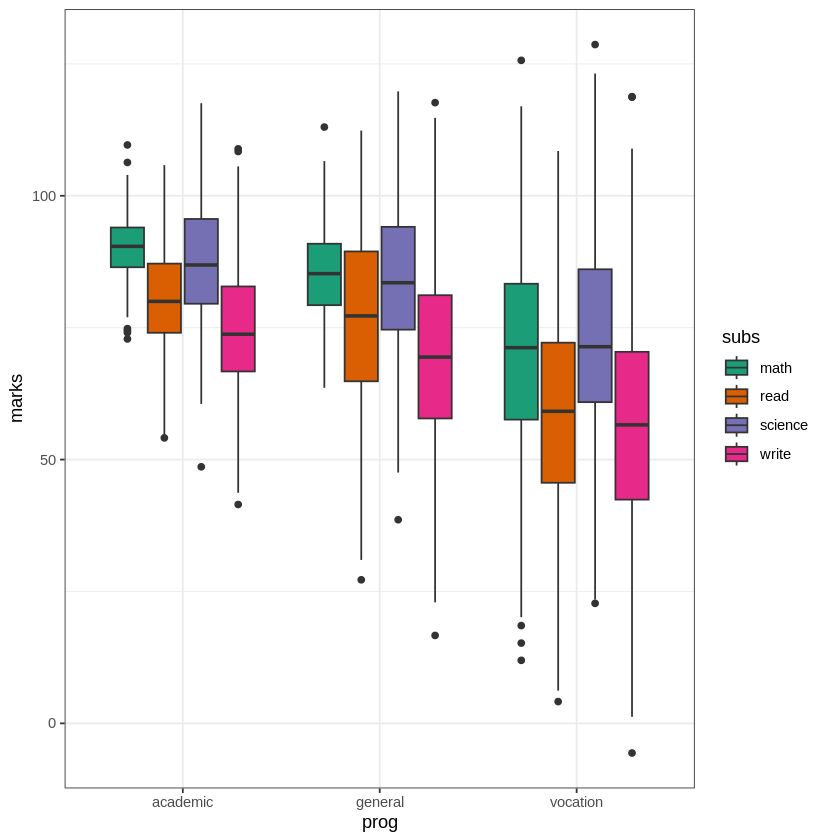

In [108]:
# Plot the scores per program with color
student |>
  pivot_longer(read:science, values_to = "marks", names_to = "subs") |>
  ggplot(aes(x = prog, y = marks, fill = subs)) +
  geom_boxplot() +
  theme_bw() +
  scale_fill_brewer(palette = "Dark2")

# 3. Generalized linear model

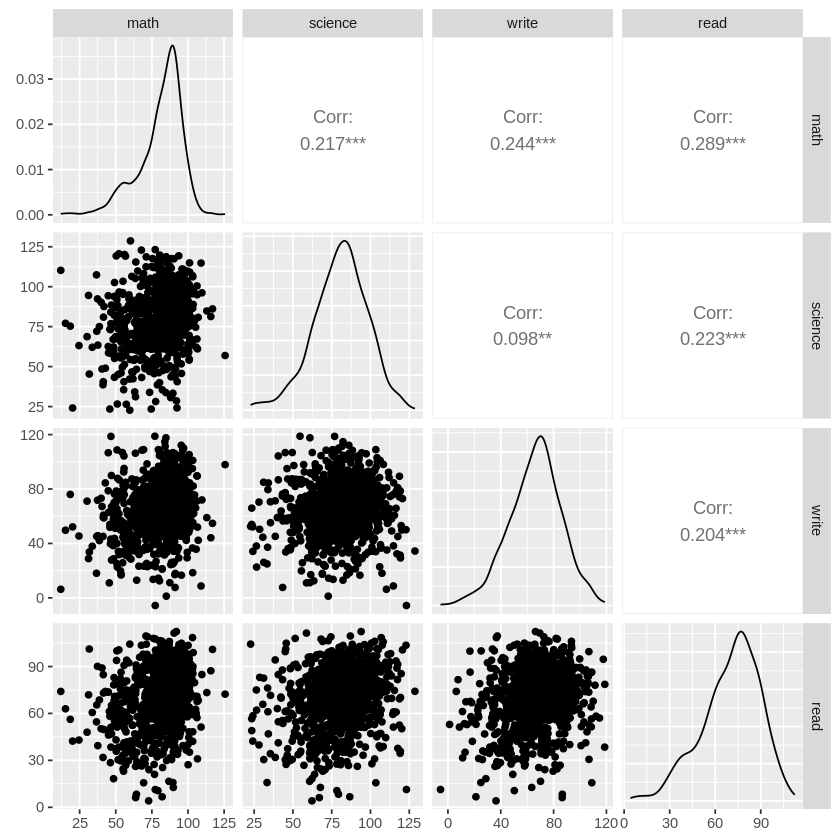

In [109]:
# Visuzlize pairs
student |>
  select(math, science, write, read) |>
  ggpairs(progress = FALSE)

In [110]:
# Academic-vocation distinction
# Prepare the dataframe to have only those two programs
# For binomial GLM, the response variable can be either 0 or 1
df_vocation <- student |>
  filter(prog != "general") |>
  mutate(vocation = ifelse(prog == "vocation", 1, 0))
with(df_vocation, table(vocation))

vocation
  0   1 
300 400 

In [111]:
# Fit the glm
vocation_glm <- glm(vocation ~ ses + read + write + math + science, data = df_vocation, family = "binomial")
summary(vocation_glm)


Call:
glm(formula = vocation ~ ses + read + write + math + science, 
    family = "binomial", data = df_vocation)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 23.745051   2.108045  11.264  < 2e-16 ***
seslow       2.353971   0.361388   6.514 7.33e-11 ***
sesmiddle    0.655155   0.344289   1.903   0.0571 .  
read        -0.085941   0.012049  -7.132 9.86e-13 ***
write       -0.066213   0.009506  -6.966 3.27e-12 ***
math        -0.117852   0.014410  -8.179 2.87e-16 ***
science     -0.047634   0.009991  -4.768 1.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 956.07  on 699  degrees of freedom
Residual deviance: 322.33  on 693  degrees of freedom
AIC: 336.33

Number of Fisher Scoring iterations: 7


In [112]:
# Use the step function to find the best model on the basis of AIC
# Finds a greedy solution
# Does not consider all possible predictor combinactions
# Sub-optimal solutions
step(vocation_glm)

Start:  AIC=336.33
vocation ~ ses + read + write + math + science

          Df Deviance    AIC
<none>         322.33 336.33
- science  1   348.32 360.32
- ses      2   371.59 381.59
- write    1   389.20 401.20
- read     1   396.01 408.01
- math     1   434.41 446.41



Call:  glm(formula = vocation ~ ses + read + write + math + science, 
    family = "binomial", data = df_vocation)

Coefficients:
(Intercept)       seslow    sesmiddle         read        write         math  
   23.74505      2.35397      0.65515     -0.08594     -0.06621     -0.11785  
    science  
   -0.04763  

Degrees of Freedom: 699 Total (i.e. Null);  693 Residual
Null Deviance:	    956.1 
Residual Deviance: 322.3 	AIC: 336.3

In [113]:
# Academic-general comparison
glm_general <- student |>
  filter(prog != "vocation") |>
  mutate(general = ifelse(prog == "general", 1, 0)) |>
  glm(general ~ ses + read + write + math + science, data = _, family = "binomial")

summary(glm_general)


Call:
glm(formula = general ~ ses + read + write + math + science, 
    family = "binomial", data = mutate(filter(student, prog != 
        "vocation"), general = ifelse(prog == "general", 1, 0)))

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 12.323888   1.583542   7.782 7.11e-15 ***
seslow       1.437217   0.250826   5.730 1.00e-08 ***
sesmiddle    1.029108   0.208754   4.930 8.23e-07 ***
read        -0.024276   0.006835  -3.552 0.000383 ***
write       -0.023523   0.006171  -3.812 0.000138 ***
math        -0.097357   0.013540  -7.191 6.45e-13 ***
science     -0.009387   0.007091  -1.324 0.185561    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 831.78  on 599  degrees of freedom
Residual deviance: 686.72  on 593  degrees of freedom
AIC: 700.72

Number of Fisher Scoring iterations: 4


In [114]:
# Use the step funciton
step(glm_general)

Start:  AIC=700.72
general ~ ses + read + write + math + science

          Df Deviance    AIC
- science  1   688.48 700.48
<none>         686.72 700.72
- read     1   699.91 711.91
- write    1   701.98 713.98
- ses      2   730.94 740.94
- math     1   746.79 758.79

Step:  AIC=700.48
general ~ ses + read + write + math

        Df Deviance    AIC
<none>       688.48 700.48
- read   1   702.63 712.63
- write  1   703.49 713.49
- ses    2   733.38 741.38
- math   1   750.30 760.30



Call:  glm(formula = general ~ ses + read + write + math, family = "binomial", 
    data = mutate(filter(student, prog != "vocation"), general = ifelse(prog == 
        "general", 1, 0)))

Coefficients:
(Intercept)       seslow    sesmiddle         read        write         math  
   11.62520      1.43377      1.04893     -0.02500     -0.02334     -0.09816  

Degrees of Freedom: 599 Total (i.e. Null);  594 Residual
Null Deviance:	    831.8 
Residual Deviance: 688.5 	AIC: 700.5

No indication from these anlayses that the full model cannot be used

In [127]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.6.1    GGally_2.3.0    lubridate_1.9.4 forcats_1.0.0  
 [5] stringr_1.5.1   dplyr_1.1.4     purrr_1.1.0     readr_2.1.5    
 [9] tidyr_1.3.1     tibble_3.3.0    ggpl